# Setup

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison

In [3]:
original_res = pd.read_parquet('entire_results_original.parquet')
attn_res = pd.read_parquet('entire_results_attention.parquet')

In [13]:
print("Original hits:")
print(original_res['hit'].sum())
print("Original accuracy:")
print(original_res['hit'].mean())

Original hits:
18185
Original accuracy:
0.8296455130252293


In [14]:
print("Attention hits:")
print(attn_res['hit'].sum())
print("Attention accuracy:")
print(attn_res['hit'].mean())

Attention hits:
18192
Attention accuracy:
0.8299648706601579


In [21]:
attn_res['true_prob_diff'] = attn_res['true_prob'] - original_res['true_prob']

In [33]:
print(f'Difference in probabilities for true label:')
print('Mean:')
print(attn_res['true_prob_diff'].mean())
print('Max:')
print(attn_res['true_prob_diff'].max())
print('Min:')
print(attn_res['true_prob_diff'].min())
print("Count of abs. larger than 0.1:")
print((attn_res['true_prob_diff'].abs() > 0.1).sum())

Difference in probabilities for true label:
Mean:
-0.001262674408166339
Max:
0.006900484673678875
Min:
-0.9549880771664903
Count of abs. larger than 0.1:
73


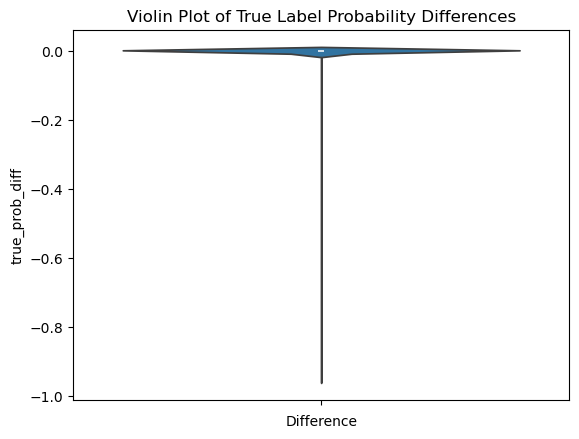

In [23]:
sns.violinplot(data=attn_res['true_prob_diff'])
plt.title('Violin Plot of True Label Probability Differences')
plt.xlabel('Difference')
plt.show()

In [24]:
attn_res['false_prob_diff'] = attn_res['false_prob'] - original_res['false_prob']

In [34]:
print(f'Difference in probabilities for false label:')
print('Mean:')
print(attn_res['false_prob_diff'].mean())
print('Max:')
print(attn_res['false_prob_diff'].max())
print('Min:')
print(attn_res['false_prob_diff'].min())
print("Count of abs. larger than 0.1:")
print((attn_res['false_prob_diff'].abs() > 0.1).sum())

Difference in probabilities for false label:
Mean:
-5.5100893843130884e-05
Max:
0.0014454941265285015
Min:
-0.38566351355984807
Count of abs. larger than 0.1:
3


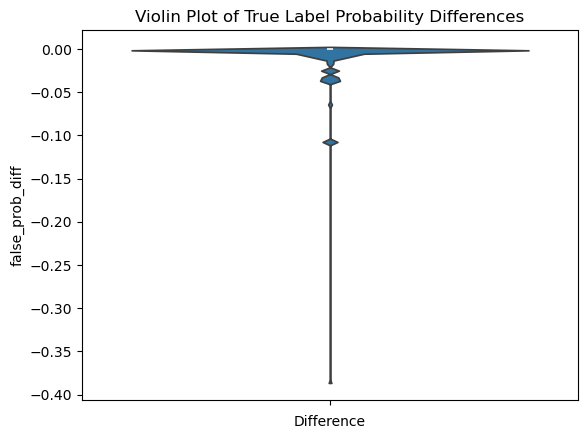

In [26]:
sns.violinplot(data=attn_res['false_prob_diff'])
plt.title('Violin Plot of True Label Probability Differences')
plt.xlabel('Difference')
plt.show()

In [32]:
print("Mismatch count:")
print((attn_res['hit'] ^ original_res['hit']).sum())

Mismatch count:
269
